<a href="https://colab.research.google.com/github/Kakumanu-Harshitha/Customer-Chun-Prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn prediction
Customer churn prediction is used to identify which customers are likely to leave a business or service in the near future. By predicting churn, companies can take proactive measures to retain those customers, such as offering incentives, improving customer service, or addressing pain points. This helps reduce customer turnover, improve customer retention, and ultimately increase profitability. Churn prediction is particularly valuable in industries with subscription-based models, such as telecommunications, finance, and SaaS, where retaining existing customers is more cost-effective than acquiring new ones.

# Steps to Build this model

1.Import Libraries

2.Import Dataset

3.Data Preprocessing

    * Finding and Filling missing values

    * Label Encoding

    * Normalization

    * Splitting into Features and target variables

    * Splitting into train and test set

4.Data Visualisation

5.Algorithm Evaluation and Comparison

    a.Random Forest Classification

    b.Desicion tree Classification

    c.Support vector Classification

    d.Gradient Boosting Classification

    e.Knn Classification

    f.Logistic Classification

6.Model Comparion Table

7.Best Model Selection

8.Visualise Actual and predicted values



# 1.Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2.Import Dataset

Reference:https://www.kaggle.com/datasets/blastchar/telco-customer-churn

This is reference of the dataset

In [128]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Remove customerId because ,That is not useful for classification.So we removed it.

In [ ]:
df.drop('customerID',axis=1,inplace=True)

# 3.Data preprocessing

# Finding Missing values

In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


There are 11 missing values.So we have to fill them with either mean or null or avg.
Here I am filling with mean.

# Filling Missing values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Let's describe the dataset.It is commonly used to get an overview of the data, helping identify key characteristics like central tendency, spread, and the distribution of values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Info() is used to understand the structure of the dataset, detect data types, and check for missing values.

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cols=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for column in cols:
    df[column] = label_encoder.fit_transform(df[column])

print(df)

      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0          0              0        1           0  0.013889             0   
1          1              0        0           0  0.472222             1   
2          1              0        0           0  0.027778             1   
3          1              0        0           0  0.625000             0   
4          0              0        0           0  0.027778             1   
...      ...            ...      ...         ...       ...           ...   
7038       1              0        1           1  0.333333             1   
7039       0              0        1           1  1.000000             1   
7040       0              0        1           1  0.152778             0   
7041       1              1        1           0  0.055556             1   
7042       1              0        0           0  0.916667             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                

In [ ]:
num_cols=['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[num_cols])
df[num_cols] = scaled_data


# Splitting into target and features

In [ ]:
x=df.drop('Churn',axis=1)
y=df['Churn']

# Splitting into Train and Test data

Let's split the data into 80% train data and 20% test data.
here I am using stratify to divides classes into both test and train data.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
print(x_train)

      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
3738       1              0        0           0  0.486111             0   
3151       1              0        1           1  0.208333             1   
4860       1              0        1           1  0.180556             0   
3867       0              0        1           0  0.361111             1   
3810       1              0        1           1  0.013889             1   
...      ...            ...      ...         ...       ...           ...   
6303       0              0        1           0  0.986111             1   
6227       1              0        0           0  0.027778             1   
4673       0              1        0           0  0.347222             1   
2710       0              0        1           0  0.333333             1   
5639       1              0        0           0  0.083333             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
3738             

To know shapes...

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 19)
(1409, 19)
(5634,)
(1409,)


# 4.Data Visualization

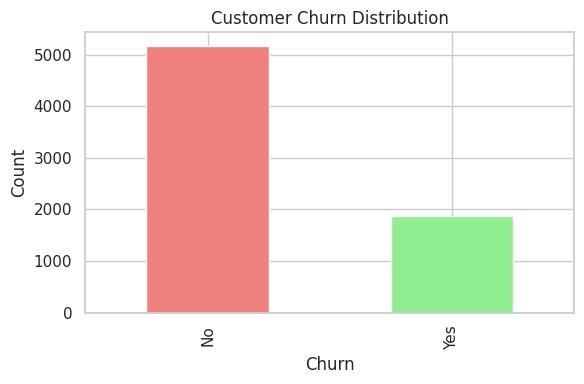

In [129]:
churn_counts = df['Churn'].value_counts()

# Plotting the churn distribution using Matplotlib
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['lightcoral', 'lightgreen'])

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Customer Churn Distribution')

# Show the plot
plt.tight_layout()
plt.show()

In [131]:
y.value_counts()


,count
Churn,
0,5174
1,1869


# 5.Algorithm Evaluation and Comparison
Key Metrics: Accuracy: Measures the overall correctness of the model by comparing the number of correct predictions to the total number of predictions.

Precision (weighted average): Indicates how well the model avoids false positives, weighted by the number of samples in each class.

Recall (weighted average): Shows the model's ability to correctly identify all instances of each class, weighted by class size.

F1 Score (weighted average): Represents the harmonic mean of precision and recall, providing a balanced metric for evaluating classification performance.

# Evaluation Metrics

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
)

def evaluate_classification_model(y_true, y_pred, labels=None):

    print("=== Classification Metrics ===")

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Precision
    precision = precision_score(y_true, y_pred, average='weighted')
    print(f"Precision: {precision:.2f}")

    # Recall
    recall = recall_score(y_true, y_pred, average='weighted')
    print(f"Recall: {recall:.2f}")

    # F1 Score
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"F1 Score: {f1:.2f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    print("\nConfusion Matrix:")
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Classification Algorithms

# a.Random Forest Classification

=== Classification Metrics ===
Accuracy: 0.80
Precision: 0.79
Recall: 0.80
F1 Score: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1035
           1       0.68      0.47      0.56       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:


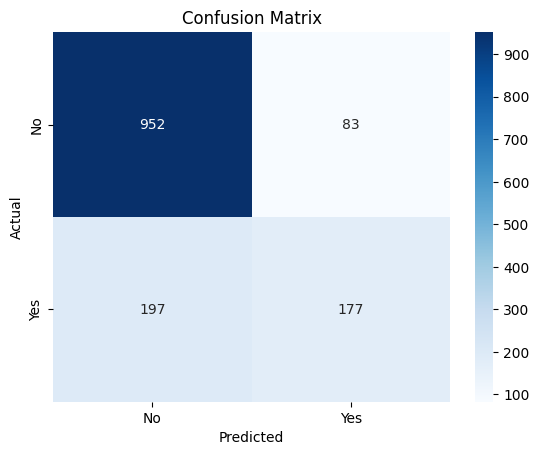

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train the model
rf_classifier = RandomForestClassifier(n_estimators=500,oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_leaf_nodes = 30)
rf_classifier.fit(x_train, y_train)
# Make predictions
y_pred=rf_classifier.predict(x_test)
#Evaluate
evaluate_classification_model(y_test, y_pred, labels=df['Churn'].unique())


# b.Desicion tree Classification

=== Classification Metrics ===
Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1 Score: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1035
           1       0.49      0.51      0.50       374

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409


Confusion Matrix:


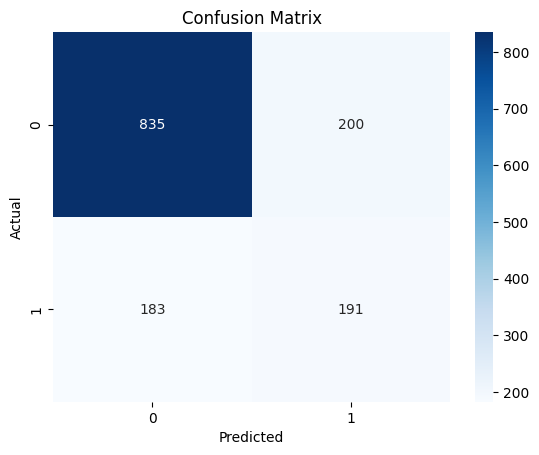

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and train the model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train)
# Make predictions
y_pred = dt_classifier.predict(x_test)
#Evaluate
evaluate_classification_model(y_test, y_pred, labels=df['Churn'].unique())

# c.Support vector Classification

=== Classification Metrics ===
Accuracy: 0.79
Precision: 0.78
Recall: 0.79
F1 Score: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix:


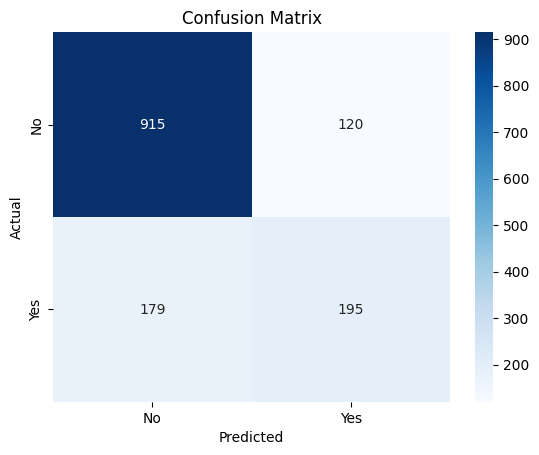

In [113]:
from sklearn.svm import SVC
# Initialize and train the model
svm = SVC(kernel='linear',random_state=2)
svm.fit(x_train, y_train)

# Make predictions
y_pred = svm.predict(x_test)
# Evaluate
evaluate_classification_model(y_test, y_pred, labels=df['Churn'].unique())

# d.Gradient Boosting Classification

=== Classification Metrics ===
Accuracy: 0.80
Precision: 0.79
Recall: 0.80
F1 Score: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:


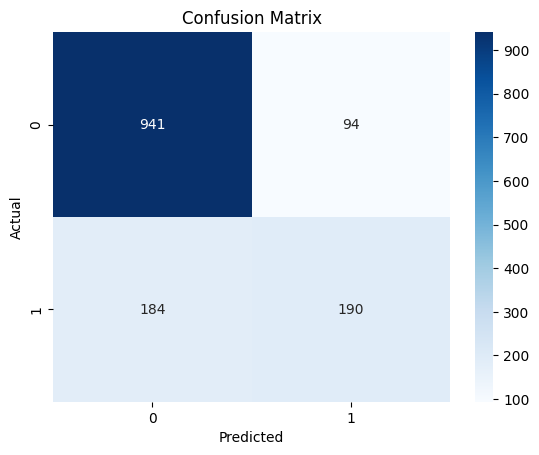

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(x_train, y_train)

# Make predictions
y_pred = gb.predict(x_test)

# Evaluate
evaluate_classification_model(y_test, y_pred, labels=df['Churn'].unique())

# e.Knn Classification

=== Classification Metrics ===
Accuracy: 0.76
Precision: 0.75
Recall: 0.76
F1 Score: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1035
           1       0.57      0.42      0.49       374

    accuracy                           0.76      1409
   macro avg       0.69      0.65      0.67      1409
weighted avg       0.75      0.76      0.75      1409


Confusion Matrix:


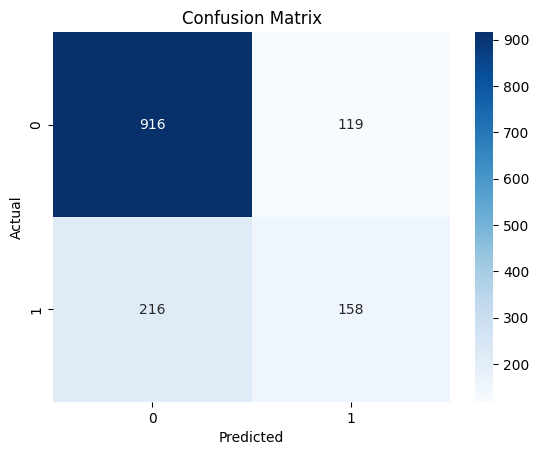

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the modelf
#for i in range(1,11):
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
# Make predictions
y_pred = knn.predict(x_test)

# Evaluate

evaluate_classification_model(y_test, y_pred, labels=df['Churn'].unique())

# f.Logistic Classification

=== Classification Metrics ===
Accuracy: 0.80
Precision: 0.79
Recall: 0.80
F1 Score: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:


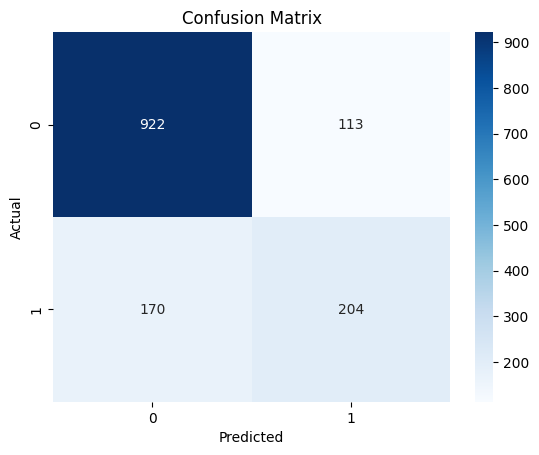

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_test)
evaluate_classification_model(y_test, y_pred, labels=df['Churn'].unique())

# g.Building a Simple Neural Network Model with Keras for Binary Classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=19))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [114]:
model.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

In [115]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10)

Epoch 1/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8090 - loss: 0.4006 - val_accuracy: 0.7935 - val_loss: 0.4272
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8118 - loss: 0.3999 - val_accuracy: 0.7956 - val_loss: 0.4260
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8114 - loss: 0.4057 - val_accuracy: 0.7963 - val_loss: 0.4258
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8135 - loss: 0.4029 - val_accuracy: 0.7885 - val_loss: 0.4280
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8206 - loss: 0.3950 - val_accuracy: 0.7864 - val_loss: 0.4404
Epoch 6/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8240 - loss: 0.3914 - val_accuracy: 0.7942 - val_loss: 0.4267
Epoch 7/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8207 - loss: 0.3917 - val_accuracy: 0.7921 - val_loss: 0.4279
Epoch 8/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8177 - loss: 0.3960 - val_accuracy: 0.

In [116]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.4321
Test Accuracy: 0.7921


Train Accuracy:0.8220

Test loss:0.3924

In [117]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [118]:
y_pred = model.predict(x_test)
y_pred_classes=[]
for i in y_pred:
    if i>0.5:
        y_pred_classes.append(1)
    else:
        y_pred_classes.append(0)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


This is useful for binary classification tasks where the output needs to be interpreted as class 0 (negative) or class 1 (positive).

In [120]:
class_counts = pd.Series(y_pred_classes).value_counts()

print(class_counts)

0    1098
1     311
Name: count, dtype: int64


 **Evaluate the neural network**

=== Classification Metrics ===
Accuracy: 0.79
Precision: 0.78
Recall: 0.79
F1 Score: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409


Confusion Matrix:


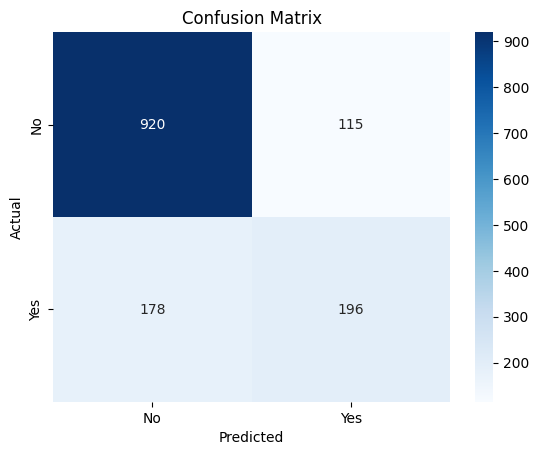

In [121]:
evaluate_classification_model(y_test, y_pred_classes, labels=df['Churn'].unique())

# 6.Model Comparison Table

In [122]:
data = {
    'Model': [
        'Neural Network', 'Random Forest', 'Decision Tree',
        'Support Vector Machine', 'Gradient Boosting', 'KNN', 'Logistic Regression'
    ],
    'Accuracy': [0.79, 0.80, 0.73, 0.79, 0.80, 0.76, 0.80],
    'Precision': [0.78, 0.79, 0.73, 0.78, 0.79, 0.75, 0.79],
    'Recall': [0.79, 0.80, 0.73, 0.79, 0.80, 0.76, 0.80],
    'F1 Score': [0.79, 0.79, 0.73, 0.78, 0.79, 0.75, 0.79],
    'Test Loss': [0.4269, '-', '-', '-', '-', '-', '-'],
    'Train Accuracy': [0.8203, '-', '-', '-', '-', '-', '-']
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the table
print(df)

                    Model  Accuracy  Precision  Recall  F1 Score Test Loss  \
0          Neural Network      0.79       0.78    0.79      0.79    0.4269   
1           Random Forest      0.80       0.79    0.80      0.79         -   
2           Decision Tree      0.73       0.73    0.73      0.73         -   
3  Support Vector Machine      0.79       0.78    0.79      0.78         -   
4       Gradient Boosting      0.80       0.79    0.80      0.79         -   
5                     KNN      0.76       0.75    0.76      0.75         -   
6     Logistic Regression      0.80       0.79    0.80      0.79         -   

  Train Accuracy  
0         0.8203  
1              -  
2              -  
3              -  
4              -  
5              -  
6              -  


# 7.Best Model Selection
 Among all these ,***Neural Networks*** is the best.later,Even we can also **consider Random** Forest and **Gradient Boosting** also.

# 8.Visualize Actual vs Predicted values

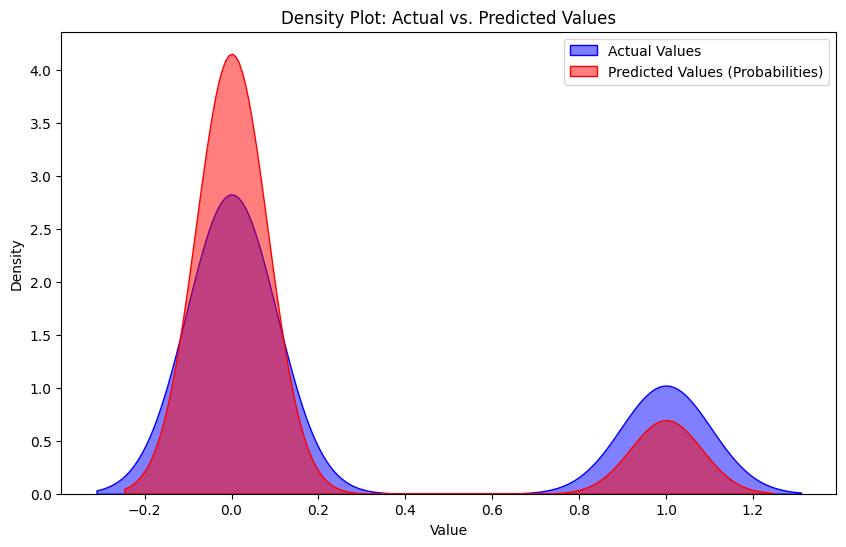

In [ ]:
import seaborn as sns

# Density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color='blue', label='Actual Values', fill=True, alpha=0.5)
sns.kdeplot(y_pred_classes, color='red', label='Predicted Values (Probabilities)', fill=True, alpha=0.5)
plt.title('Density Plot: Actual vs. Predicted Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()
